<a href="https://colab.research.google.com/github/Azaheed/Azaheed/blob/main/Predicting_Ice_cream_Production_using_ARMA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

# **ICE CREAM DATA**

In [77]:
Ice_df=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=[0],squeeze=True)

In [78]:
Ice_df.head()

DATE
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
Name: IPN31152N, dtype: float64

In [79]:
Ice_df.rename('production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [80]:
#infer the frequency of the data
production_IC=Ice_df.asfreq(pd.infer_freq(Ice_df.index))

In [81]:
start_date=datetime(2000,1,1)
end_date=datetime(2004,1,1)
lim_ice_prod=production_IC[start_date:end_date]

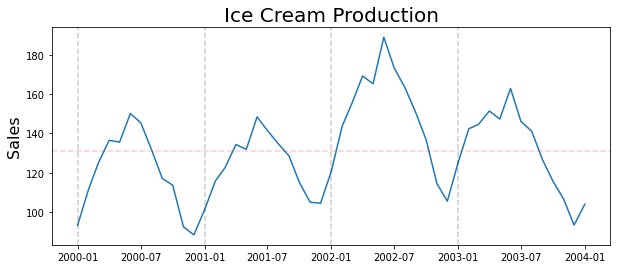

In [82]:
plt.figure(figsize=(10,4))
plt.plot(lim_ice_prod)
plt.title('Ice Cream Production', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_ice_prod.mean(), color='r', alpha=0.2, linestyle='--')

In [83]:
F_D=lim_ice_prod.diff()[1:]

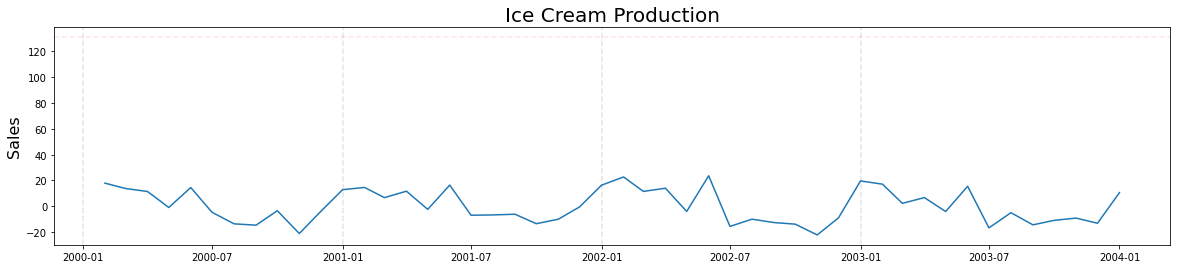

In [107]:
plt.figure(figsize=(20,4))
plt.plot(F_D)
plt.title('Ice Cream Production', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.1)
plt.axhline(lim_ice_prod.mean(), color='r', alpha=0.1, linestyle='--')

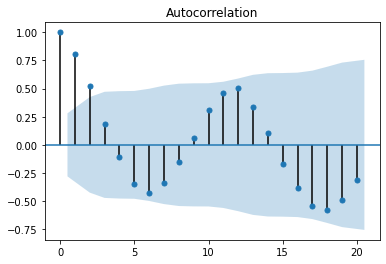

In [85]:
acf_plot=plot_acf(lim_ice_prod,lags=20)


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


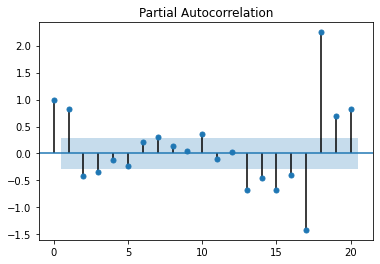

In [86]:
pacf_plot=plot_pacf(lim_ice_prod,lags=20)


In [87]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = lim_ice_prod[:train_end]
test_data = lim_ice_prod[train_end + timedelta(days=1):test_end]

In [88]:
model = ARMA(train_data, order=(4,1))
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.1825718879699707


In [89]:
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                   43
Model:                     ARMA(4, 1)   Log Likelihood                -163.003
Method:                       css-mle   S.D. of innovations             10.448
Date:                Wed, 25 May 2022   AIC                            340.006
Time:                        16:05:00   BIC                            352.335
Sample:                    01-01-2000   HQIC                           344.552
                         - 07-01-2003                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              131.6122      4.801     27.416      0.000     122.203     141.021
ar.L1.production     1.2283      0.706      1.740      0.090      -0.156       2.612
ar.L2.production    -0.1937 

In [90]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [91]:
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions

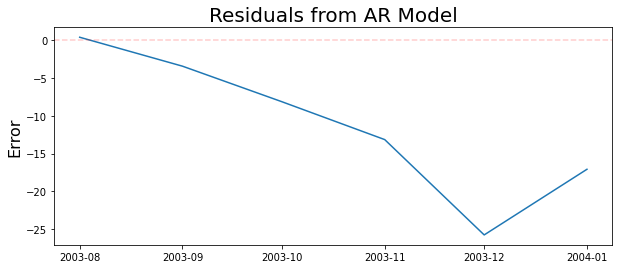

In [92]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Production')

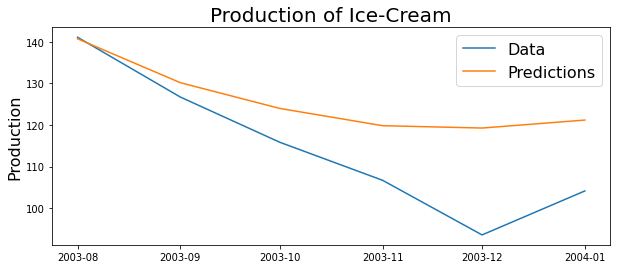

In [93]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Production of Ice-Cream', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [101]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))


Root Mean Squared Error: 14.173420883641073


# Taking First Difference to stabalize the production

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


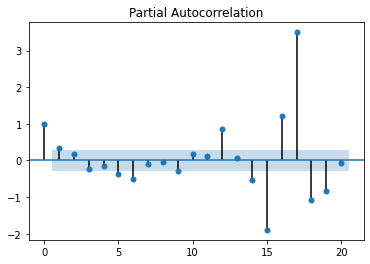

In [94]:
pacf_plot=plot_pacf(F_D,lags=20)

In [95]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = F_D[:train_end]
test_data = F_D[train_end + timedelta(days=1):test_end]

In [102]:
model = ARMA(train_data, order=(5,1))
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)
print(model_fit.summary())


Model Fitting Time: 1.1937346458435059
                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                   42
Model:                     ARMA(5, 1)   Log Likelihood                -154.966
Method:                       css-mle   S.D. of innovations              9.088
Date:                Wed, 25 May 2022   AIC                            325.931
Time:                        16:11:13   BIC                            339.833
Sample:                    02-01-2000   HQIC                           331.027
                         - 07-01-2003                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8968      0.204      4.402      0.000       0.497       1.296
ar.L1.production     0.8141      0.150      5.418      0.000       0.520  

In [103]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals1=test_data-predictions

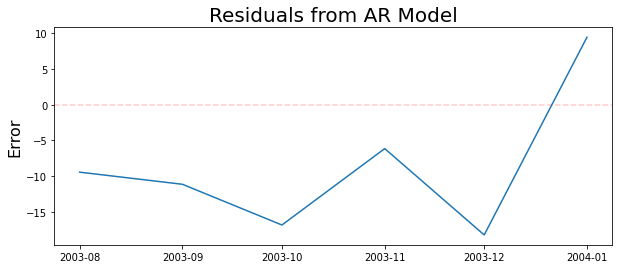

In [104]:
plt.figure(figsize=(10,4))
plt.plot(residuals1)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Production')

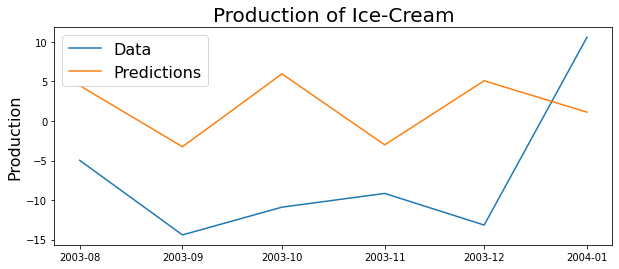

In [105]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Production of Ice-Cream', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [100]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals1**2)))

Root Mean Squared Error: 11.932989322283818
